# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Import Dataset

In [23]:
data = pd.read_csv("../dataset/airmiles.csv", index_col="Date", parse_dates=True, dayfirst=True)

In [24]:
data = data.asfreq('MS')

In [25]:
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [26]:
data.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [28]:
data = data.rename(columns={'airmiles': 'y'})
data

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
...,...
2005-01-01,42760657
2005-02-01,41120838
2005-03-01,52053059


# Exploratory Data Analysis (EDA)

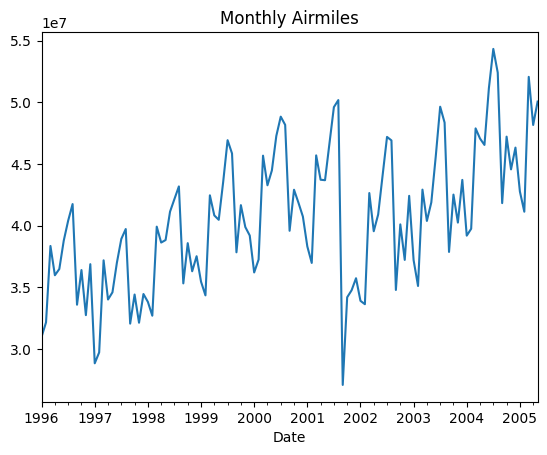

In [29]:
# Daily Closing Price Plot
data['y'].plot(title='Monthly Airmiles')
plt.show()

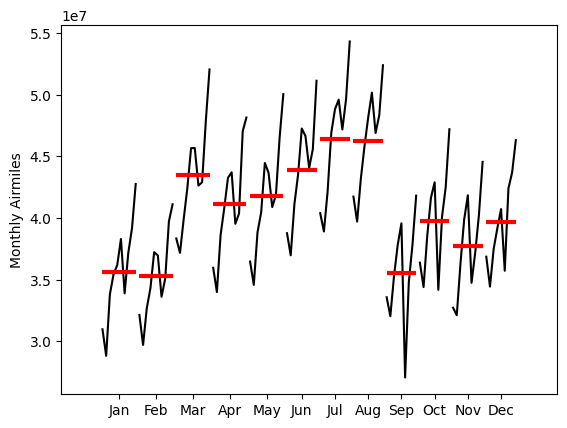

In [33]:
month_plot(data['y'], ylabel='Monthly Airmiles')
plt.show()

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_1915/4140952875.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(data['y'].resample('Q').mean(), ylabel='Monthly Airmiles')


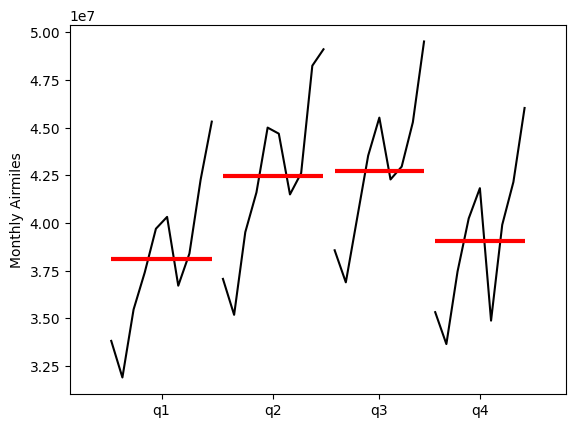

In [37]:
quarter_plot(data['y'].resample('Q').mean(), ylabel='Monthly Airmiles')
plt.show()

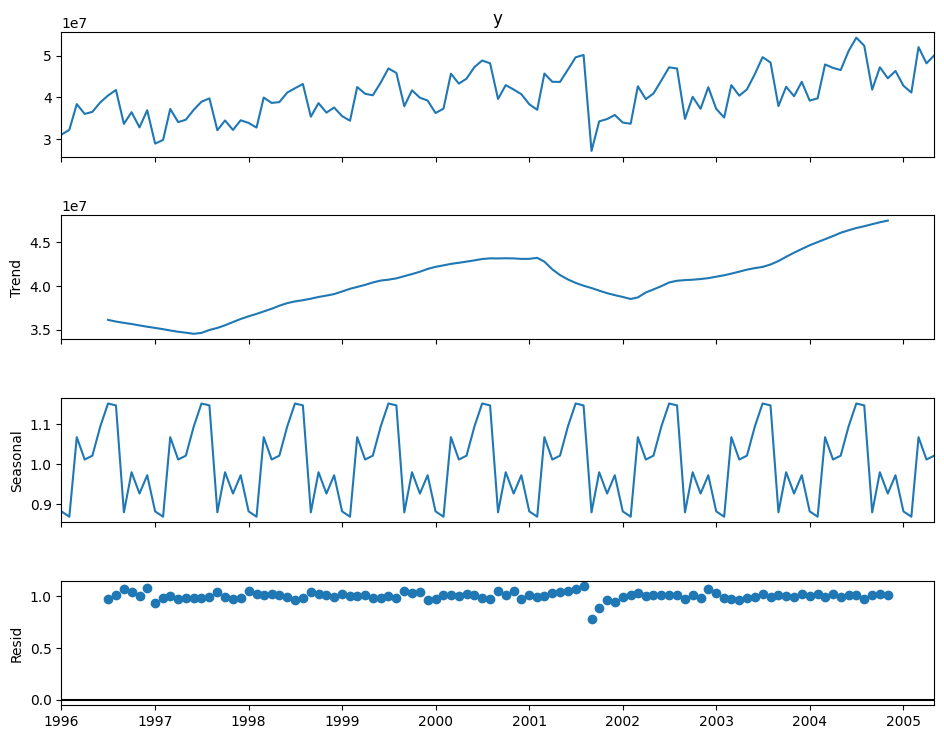

In [38]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(data['y'], model='multiplicative', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

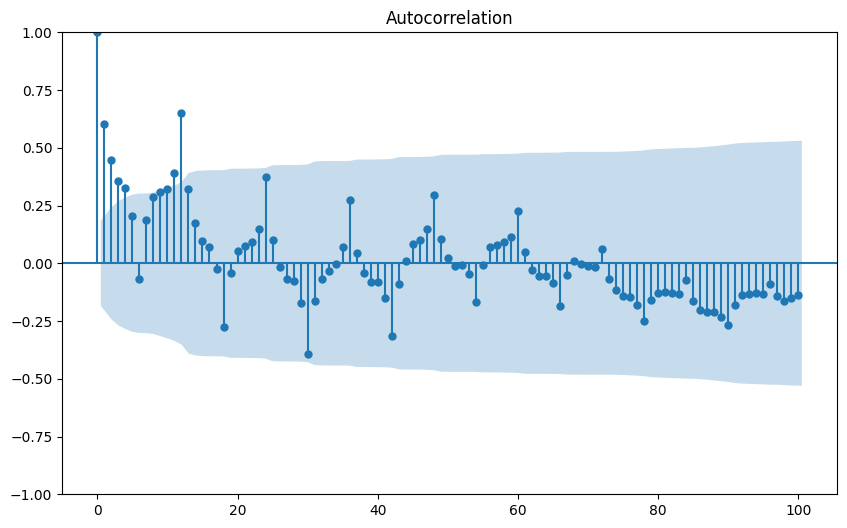

In [39]:
# Python Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(data['y'], lags=100, ax=ax)
plt.show()

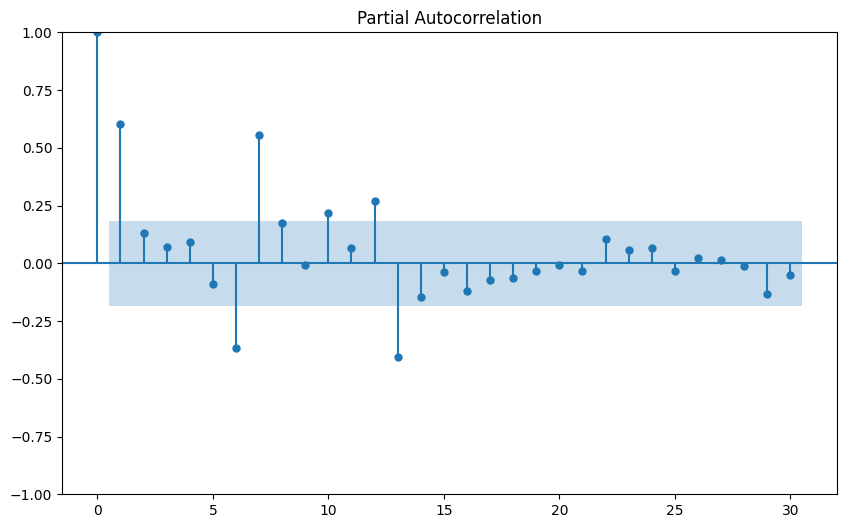

In [74]:
# Python Partial Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(data['airmiles'], lags=30, ax=ax)
plt.show()

## Model Setup

In [75]:
# Training and Test Split
periods = 12
train, test = data.iloc[:-periods, 0], data.iloc[-periods:, 0]

In [87]:
# Triple Exponential Smoothing Model AKA Holt-Winters
model_triple = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [88]:
predictions_triple = model_triple.forecast(len(test))
predictions_triple

2004-06-01    5.008193e+07
2004-07-01    5.296880e+07
2004-08-01    5.297758e+07
2004-09-01    4.026246e+07
2004-10-01    4.514112e+07
2004-11-01    4.288742e+07
2004-12-01    4.506047e+07
2005-01-01    4.099018e+07
2005-02-01    4.067542e+07
2005-03-01    4.995162e+07
2005-04-01    4.748804e+07
2005-05-01    4.804788e+07
Freq: MS, dtype: float64

## Model Assessment

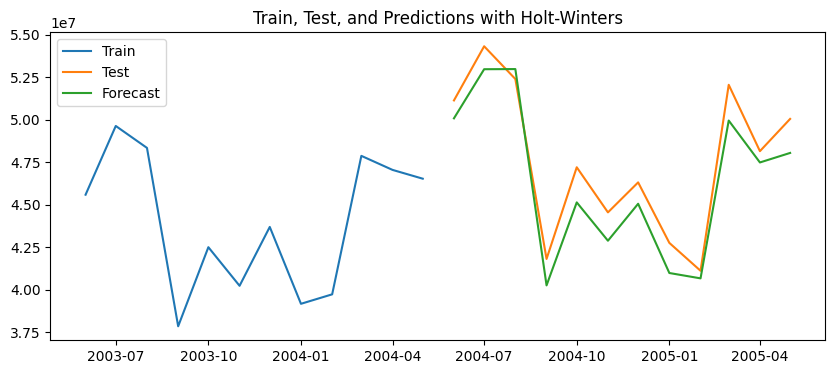

Mean Absolute Error              : 1375696.772181229
Mean Absolute Percentage Error   : 2.90
Mean Squared Error               : 2207532424540.3647
Root Mean Squared Error          : 1485776.7074969122


In [89]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
    # Plot training, test, and forecasts
    plt.figure(figsize=(10, 4))
    plt.plot(train[-12:], label='Train')
    plt.plot(test, label='Test')
    plt.plot(predictions, label='Forecast')
    plt.title(f"Train, Test, and Predictions with {chart_title}")
    plt.legend()
    plt.show()

    # Calculating MAE, MSE, MAPE, RMSE
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = root_mean_squared_error(test, predictions)

    print(f'Mean Absolute Error              : {mae}')
    print(f'Mean Absolute Percentage Error   : {mape * 100:.2f}')
    print(f'Mean Squared Error               : {mse}')
    print(f'Root Mean Squared Error          : {rmse}')

# model_assessment(train, test, predictions_simple, 'Simple Exp Smoothing')
# model_assessment(train, test, predictions_double, 'Double Exp Smoothing')
model_assessment(train, test, predictions_triple, 'Holt-Winters')
# model_assessment(train['2022-06':], test, predictions_triple, 'Holt-Winters')

## Predicting the Future

In [79]:
# Function to plot the future
def plot_future(y, forecast, title):
    # Plot training, test, and forecasts
    plt.figure(figsize=(10, 4))
    plt.plot(y, label='Train')
    plt.plot(forecast, label='Forecast')
    plt.title(f"Train, Test, and Predictions with {title}")
    plt.legend()
    plt.show()

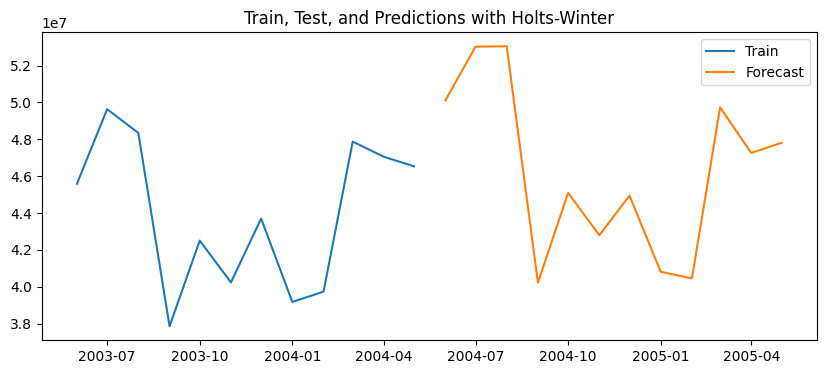

In [85]:
plot_future(train[-12:], predictions_triple, 'Holts-Winter')